<br/>

## Tarea 3 - Segmentación supervisada
### Alumno - Sebastián Ituarte
<span style="color:green"><b>Minería de datos empresariales</b></span>

---



In [178]:
# Importamos librerías necesarias para la tarea
from enum import Enum

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

## Actividad 1

In [4]:
# Importamos datos necesarios a DataFrame
df = pd.read_csv("heart_aux.csv")

In [5]:
# Imprimimos características
print("Características del Dataframe")
num_filas, num_columnas = df.shape
print(df.shape)

# Cantidad de registros filas
print("Cantidad de filas")
print(num_filas)

# Cantidad de características columnas
print("Cantidad de columnas")
print(num_columnas)

# Imprimimos los nombres de las columnas
print("\n")
print("Nombre de sus columnas")
print(df.columns)

Características del Dataframe
(1025, 14)
Cantidad de filas
1025
Cantidad de columnas
14


Nombre de sus columnas
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [9]:
# Visualizar las primeras filas del dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212,0,1,NaN,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203,1,0,155.0,1,3.1,0,0,3,0
2,70.0,1,0,145.0,174,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203,0,1,161.0,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294,1,1,NaN,0,1.9,1,3,2,0


In [11]:
# Obtener un resumen estadístico de los datos
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1004.000000,1025.000000,1025.000000,994.000000,1025.00000,1025.000000,1025.000000,984.000000,1025.000000,973.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.418327,0.695610,0.942439,131.592555,246.00000,0.149268,0.529756,149.194106,0.336585,1.045940,1.385366,0.754146,2.323902,0.513171
std,8.999961,0.460373,1.029641,17.477593,51.59251,0.356527,0.527878,22.900864,0.472772,1.162274,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Estudiamos el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1004 non-null   float64
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  994 non-null    float64
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   984 non-null    float64
 8   exang     1025 non-null   int64  
 9   oldpeak   973 non-null    float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 112.2 KB


In [15]:
# Revisamos los valores nulos
df.isnull().sum().sum()

145

In [17]:
# Creamos el tipo de datos para los tipos de variables
class TipoVariable(Enum):
    NOMINAL = "Nominal"
    ORDINAL = "Ordinal"
    INTERVALO = "Intervalo"
    RAZON = "Razón"


# Creamos diccionario con clasificación de variables
clasificacion_variables = {
    "age": TipoVariable.RAZON,  # Edad es una variable de razón
    "sex": TipoVariable.NOMINAL,  # Sexo es una variable nominal
    "cp": TipoVariable.ORDINAL,  # Tipo de dolor torácico es una variable ordinal
    "trestbps": TipoVariable.RAZON,  # Tensión arterial en reposo es una variable de razón
    "chol": TipoVariable.RAZON,  # Colesterol es una variable de razón
    "fbs": TipoVariable.NOMINAL,  # Glucemia en ayunas es una variable nominal
    "restecg": TipoVariable.ORDINAL,  # Resultado electrocardiográfico en reposo es una variable nominal
    "thalach": TipoVariable.RAZON,  # Frecuencia cardiaca máxima alcanzada es una variable de razón
    "exang": TipoVariable.NOMINAL,  # Angina inducida por ejercicio es una variable nominal
    "oldpeak": TipoVariable.INTERVALO,  # Depresión del ST inducida por el ejercicio en relación con el reposo es una variable de intervalo
    "slope": TipoVariable.ORDINAL,  # La pendiente del pico del segmento ST de ejercicio es una variable ordinal
    "ca": TipoVariable.ORDINAL,  # Número de vasos principales es una variable ordinal
    "thal": TipoVariable.ORDINAL,  # Tipo de thal es una variable ordinal
    "target": TipoVariable.NOMINAL,  # Probabilidad de infarto es una variable nominal (aunque puede ser discutible si se trata como binaria)
}

# Mostrar la clasificación de variables
for var, tipo in clasificacion_variables.items():
    print(f"{var}: {tipo.value}")

age: Razón
sex: Nominal
cp: Ordinal
trestbps: Razón
chol: Razón
fbs: Nominal
restecg: Ordinal
thalach: Razón
exang: Nominal
oldpeak: Intervalo
slope: Ordinal
ca: Ordinal
thal: Ordinal
target: Nominal


### Registrar duplicados y eliminarlos

In [20]:
# Registrar si hay duplicados
duplicated_rows = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicated_rows}")

Cantidad de filas duplicadas: 589


In [22]:
df.count()

age         1004
sex         1025
cp          1025
trestbps     994
chol        1025
fbs         1025
restecg     1025
thalach      984
exang       1025
oldpeak      973
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [24]:
# Eliminar duplicados si existen
df.drop_duplicates(inplace=True)

In [26]:
df.count()

age         416
sex         436
cp          436
trestbps    406
chol        436
fbs         436
restecg     436
thalach     396
exang       436
oldpeak     385
slope       436
ca          436
thal        436
target      436
dtype: int64

### Mostrar valores ausentes y eliminarlos si existen

In [29]:
# Mostrar si hay valores ausentes
missing_values = df.isnull().sum()
print(f"Valores ausentes por atributo:\n{missing_values}")

Valores ausentes por atributo:
age         20
sex          0
cp           0
trestbps    30
chol         0
fbs          0
restecg      0
thalach     40
exang        0
oldpeak     51
slope        0
ca           0
thal         0
target       0
dtype: int64


In [31]:
# Eliminar filas con valores ausentes
df.dropna(inplace=True)

# Mostrar la cantidad de valores ausentes después de la eliminación
missing_values_after = df.isnull().sum()
print(f"Valores ausentes después de la eliminación:\n{missing_values_after}")

Valores ausentes después de la eliminación:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [33]:
# Función para detectar outliers usando IQR
def detect_outliers(df, column):
    if df[column].dtype in ["int64", "float64"]:
        Q1 = np.quantile(df[column], 0.25)
        Q3 = np.quantile(df[column], 0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

In [35]:
# Variables continuas
continuous_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Mostrar la cantidad de outliers para cada columna continua
for column in continuous_columns:
    outliers_count = detect_outliers(df, column)
    print(f"{column}: {outliers_count} outliers")

age: 0 outliers
trestbps: 9 outliers
chol: 5 outliers
thalach: 1 outliers
oldpeak: 5 outliers


### Análisis de distribución de variables continuas con y sin la enfermedad

In [38]:
def estadistica(data, var):
    q1 = np.percentile(data[var], 25)
    q3 = np.percentile(data[var], 75)
    iqr = q3 - q1

    data_estadistica = {
        "media": np.mean(data[var]),
        "desviacion_std": np.std(data[var], ddof=1),
        "mediana": np.median(data[var]),
        "varianza": np.var(data[var], ddof=1),
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
    }

    print(f"Datos estadisticos para variable - {var}")
    print(data_estadistica)


# Analizamos las variables previo a crear los gráficos
for variable in continuous_columns:
    estadistica(df, variable)
    print("\n")

Datos estadisticos para variable - age
{'media': 54.388704318936874, 'desviacion_std': 9.04608968830997, 'mediana': 55.0, 'varianza': 81.83173864894796, 'q1': 48.0, 'q3': 61.0, 'iqr': 13.0}


Datos estadisticos para variable - trestbps
{'media': 131.6079734219269, 'desviacion_std': 17.592398061263786, 'mediana': 130.0, 'varianza': 309.4924695459578, 'q1': 120.0, 'q3': 140.0, 'iqr': 20.0}


Datos estadisticos para variable - chol
{'media': 246.31229235880397, 'desviacion_std': 51.736597121646625, 'mediana': 240.0, 'varianza': 2676.675481727574, 'q1': 211.0, 'q3': 274.0, 'iqr': 63.0}


Datos estadisticos para variable - thalach
{'media': 149.6611295681063, 'desviacion_std': 22.88619927787244, 'mediana': 153.0, 'varianza': 523.7781173864889, 'q1': 134.0, 'q3': 166.0, 'iqr': 32.0}


Datos estadisticos para variable - oldpeak
{'media': 1.0398671096345515, 'desviacion_std': 1.1620694108419758, 'mediana': 0.8, 'varianza': 1.350405315614617, 'q1': 0.0, 'q3': 1.6, 'iqr': 1.6}




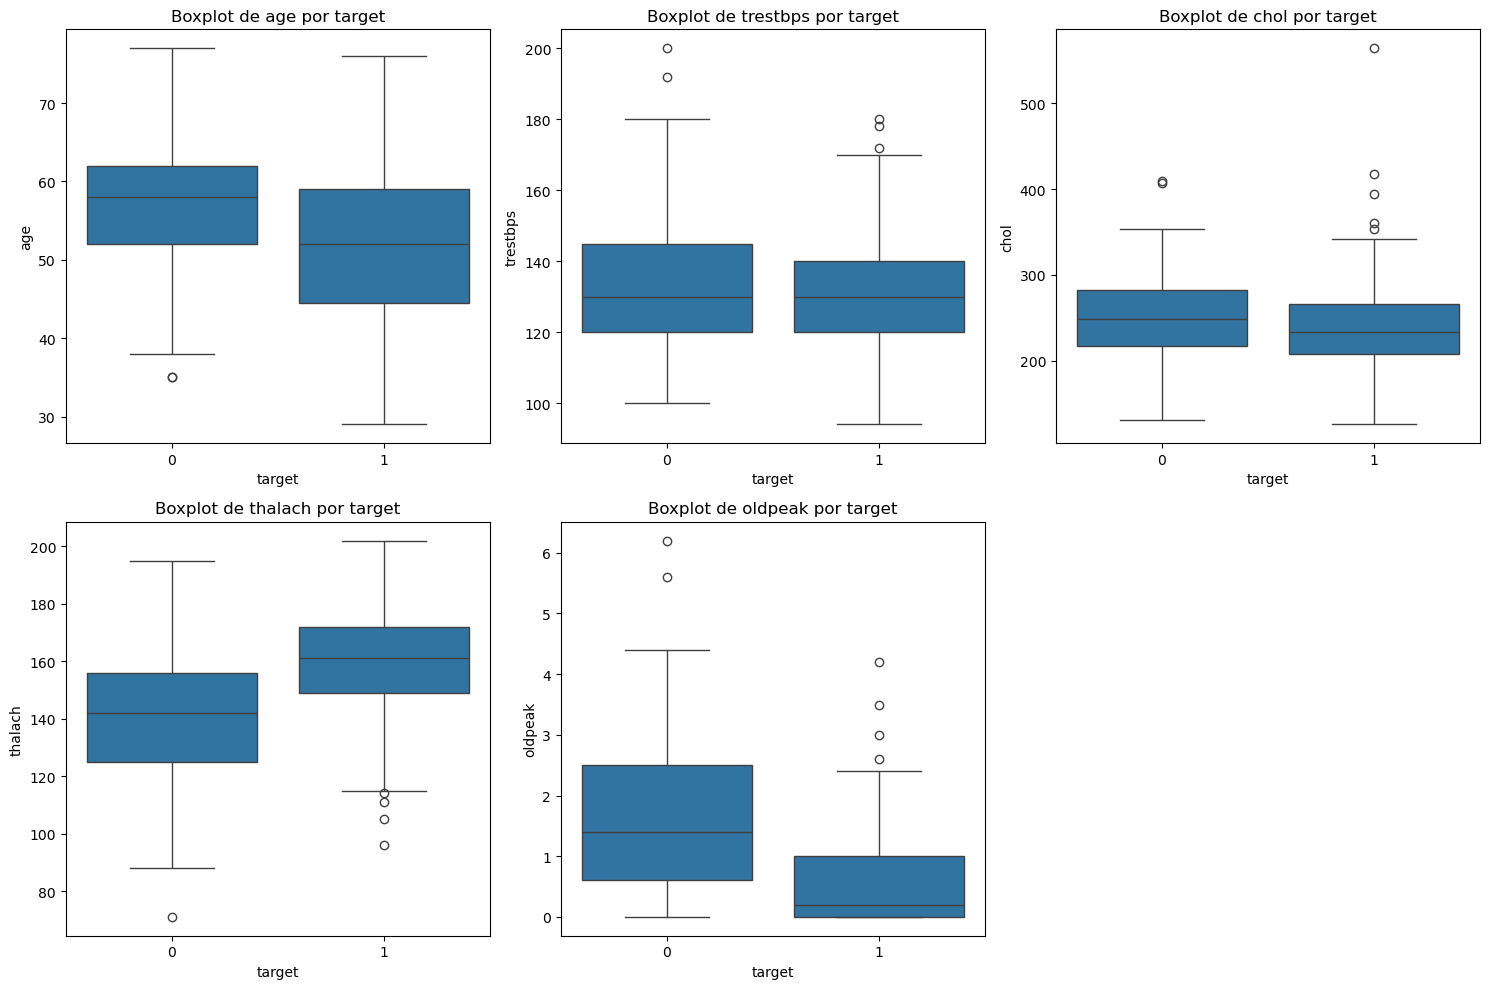

In [40]:
# Boxplots para variables continuas separadas por la variable objetivo 'target'
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="target", y=column, data=df)
    plt.title(f"Boxplot de {column} por target")
plt.tight_layout()
plt.show()

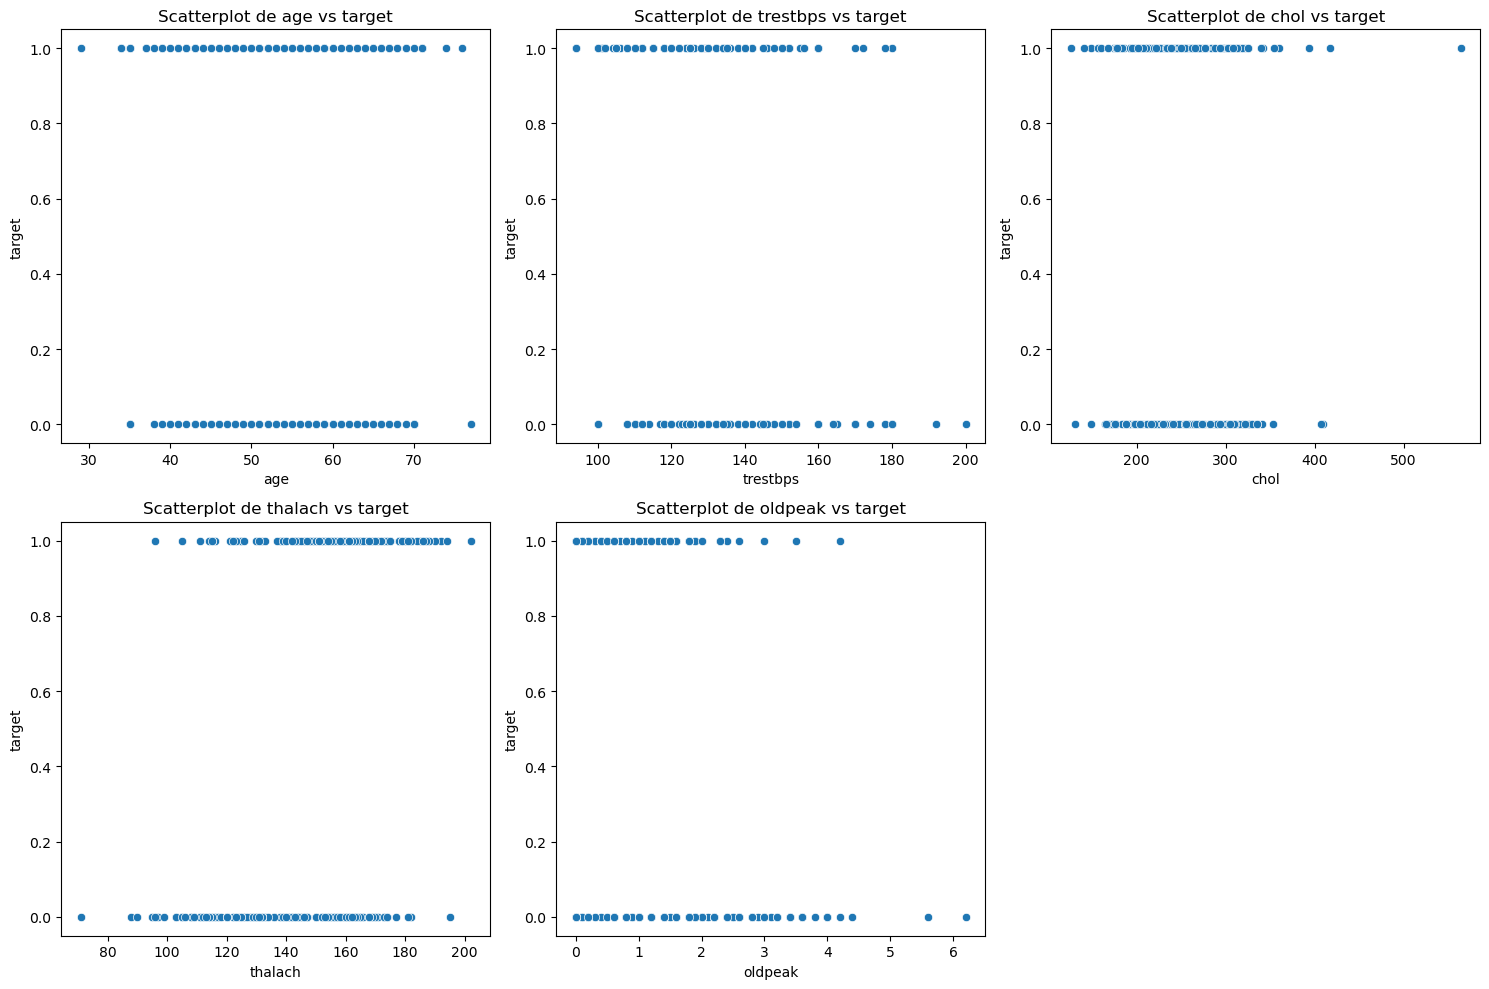

In [42]:
# Scatterplots para variables continuas
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=column, y="target", data=df)
    plt.title(f"Scatterplot de {column} vs target")
plt.tight_layout()
plt.show()

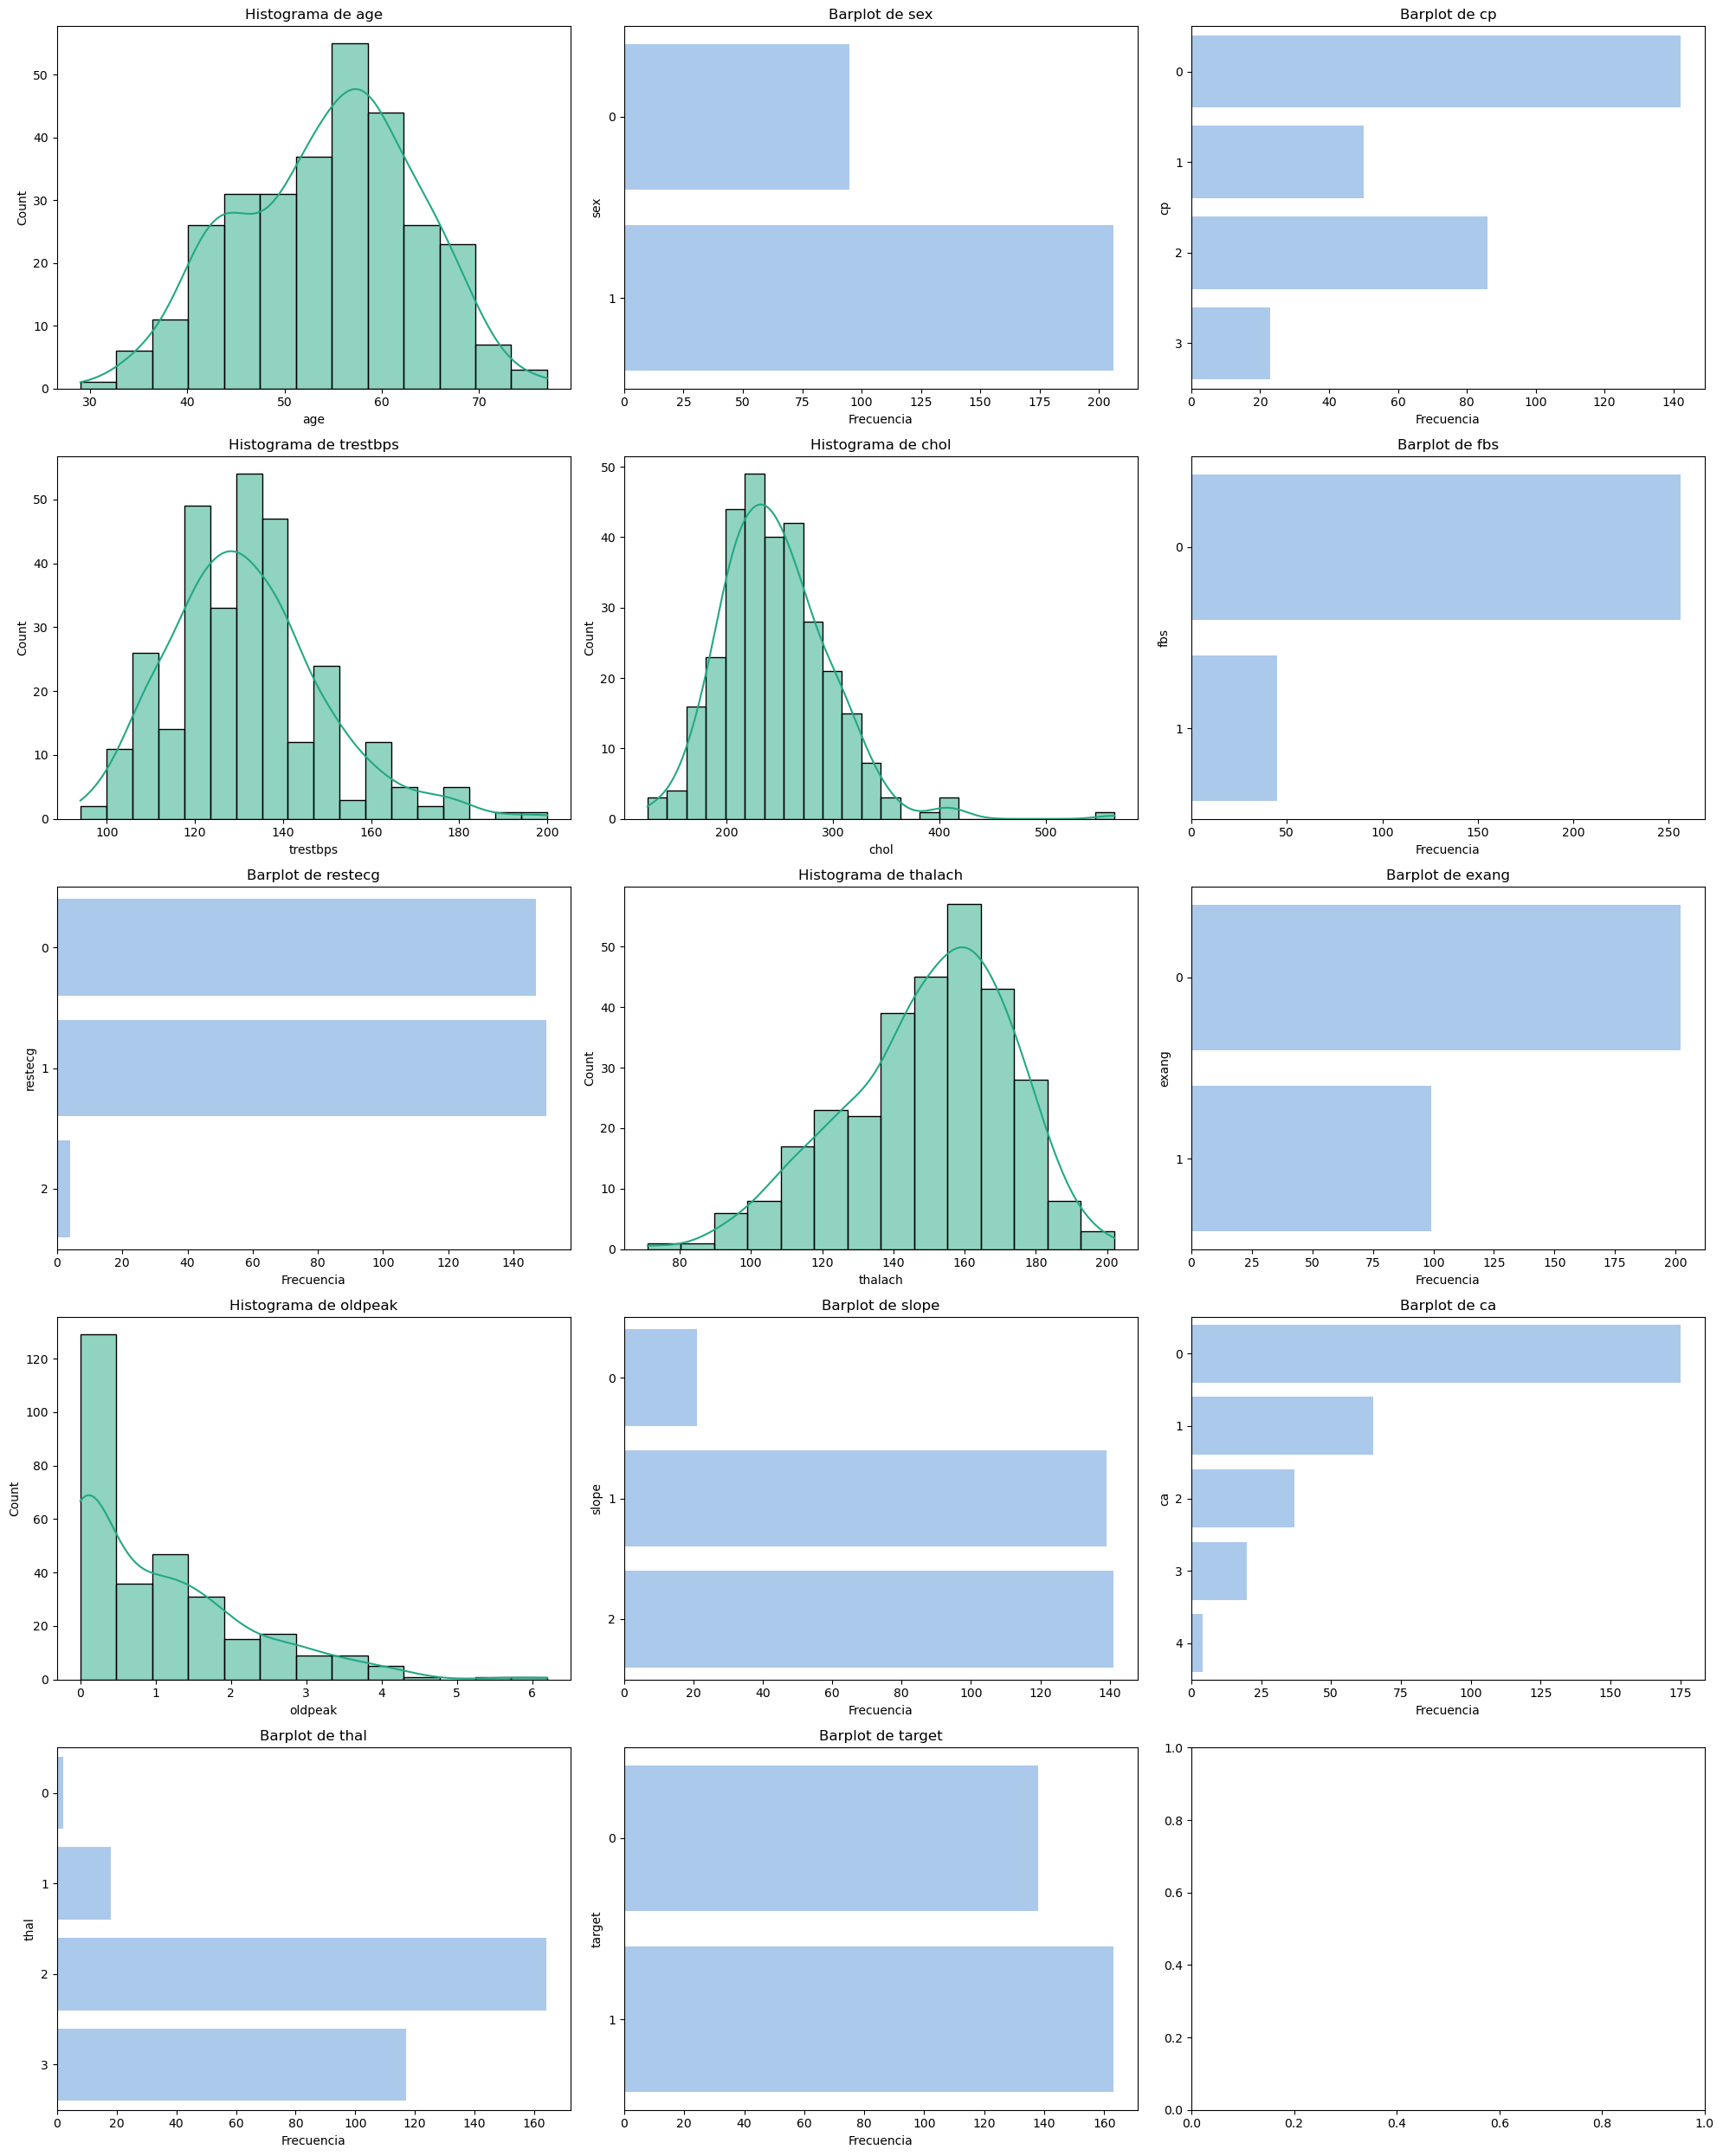

In [44]:
# Crear la figura y los ejes
num_columns = 3
num_rows = (len(df.columns) + num_columns - 1) // num_columns
fig, ax = plt.subplots(num_rows, num_columns, figsize=(20, 25))

# Definir colores
hist_palette = sns.color_palette("viridis", as_cmap=True)
bar_palette = sns.color_palette("pastel")

# Iterar sobre las columnas y crear el gráfico correspondiente
for i, col in enumerate(df.columns):
    row = i // num_columns
    col_pos = i % num_columns

    if col in continuous_columns:
        sns.histplot(df[col], kde=True, ax=ax[row, col_pos], color=hist_palette(0.6))
        ax[row, col_pos].set_title(f"Histograma de {col}")
    else:
        cat_count = df[col].value_counts().sort_values()
        sns.barplot(
            y=cat_count.index,
            x=cat_count.values,
            ax=ax[row, col_pos],
            orient="h",
            color=bar_palette[0],
        )
        ax[row, col_pos].set_title(f"Barplot de {col}")
        ax[row, col_pos].set_xlabel("Frecuencia")
        ax[row, col_pos].set_ylabel(col)

plt.tight_layout()
plt.show()

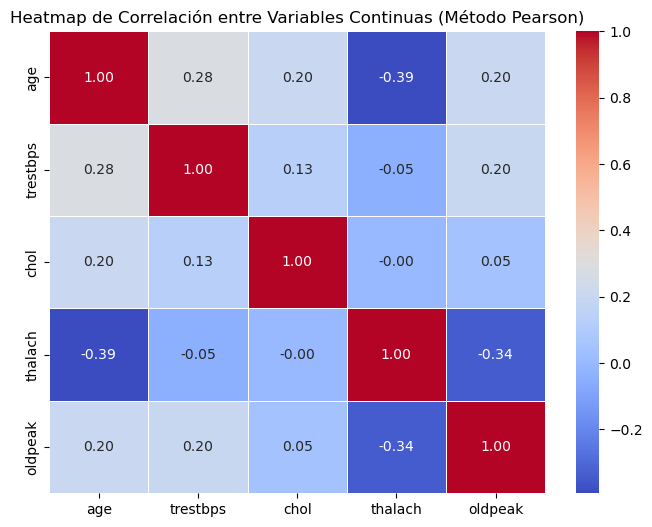

In [45]:
# Calcular la matriz de correlación solo para las variables continuas usando el método de Pearson
correlation_matrix = df[continuous_columns].corr(method="pearson")

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables Continuas (Método Pearson)")
plt.show()

### Explicación de hallazgos

#### Análisis de los Boxplots

##### age vs target (Negative/Positive):
- La mediana de la edad de los pacientes es similar entre los grupos "Negative" y "Positive".
- El rango intercuartílico y los extremos del rango de edad son también bastante similares.
- No parece haber una diferencia significativa en la distribución de la edad entre los pacientes con y sin probabilidad de infarto.

##### tresbps vs target (Negative/Positive):
- La mediana de la tensión arterial en reposo es ligeramente superior en el grupo "Positive" comparado con el grupo "Negative".
- Hay algunos outliers en el grupo "Positive", indicando valores de tensión arterial más altos.
- La distribución general de la tensión arterial en reposo muestra una leve tendencia a ser más alta en pacientes con probabilidad de infarto.

##### chol vs target (Negative/Positive):
- Las medianas de los niveles de colesterol son similares entre ambos grupos.
- Existen varios outliers en ambos grupos, con el grupo "Positive" mostrando más valores extremos altos.
- La distribución de los niveles de colesterol es similar entre los grupos, aunque hay más variabilidad en el grupo "Positive".

##### thalach vs target (Negative/Positive):
- La mediana de la frecuencia cardiaca máxima alcanzada es menor en el grupo "Positive" comparado con el grupo "Negative".
- Hay varios outliers en el grupo "Positive", indicando frecuencias cardiacas máximas más bajas.
- La distribución general de la frecuencia cardiaca máxima sugiere que los pacientes con probabilidad de infarto tienden a tener una frecuencia cardiaca máxima más baja.

##### oldpeak vs target (Negative/Positive):
- La mediana de la depresión del ST inducida por el ejercicio es mayor en el grupo "Positive".
- Existen varios outliers en el grupo "Positive", indicando valores de depresión del ST más altos.
- La distribución de `oldpeak` muestra una clara diferencia entre los grupos, con el grupo "Positive" mostrando valores más altos de depresión del ST inducida por el ejercicio.

#### Conclusiones
- **age**: No parece haber una diferencia significativa en la distribución de la edad entre los pacientes con y sin probabilidad de infarto.
- **tresbps**: La tensión arterial en reposo es ligeramente mayor en pacientes con probabilidad de infarto.
- **chol**: Los niveles de colesterol son similares entre los grupos, aunque hay más variabilidad en los pacientes con probabilidad de infarto.
- **thalach**: La frecuencia cardiaca máxima alcanzada tiende a ser menor en pacientes con probabilidad de infarto.
- **oldpeak**: La depresión del ST inducida por el ejercicio es mayor en pacientes con probabilidad de infarto.

Estos hallazgos sugieren que algunas variables, como `thalach` y `oldpeak`, pueden ser más indicativas de la probabilidad de infarto en comparación con otras. Sin embargo, se necesita un análisis más profundo, posiblemente con técnicas de modelado predictivo, para confirmar estas observaciones.


## Actividad 2

In [51]:
# Separar características y variable objetivo
X = df.drop("target", axis=1)
y = df["target"]

# Dividir los datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (210, 13)
Test: (91, 13)


### Entrenar y evaluar modelos individualmente

In [54]:
# Modelo a: criterion='gini', max_depth=2
model_a = DecisionTreeClassifier(criterion="gini", max_depth=2)
model_a.fit(X_train, y_train)

# Modelo b: criterion='gini', max_depth=3
model_b = DecisionTreeClassifier(criterion="gini", max_depth=3)
model_b.fit(X_train, y_train)

# Modelo c: criterion='gini', max_depth=4
model_c = DecisionTreeClassifier(criterion="gini", max_depth=4)
model_c.fit(X_train, y_train)

# Modelo d: criterion='entropy', max_depth=2
model_d = DecisionTreeClassifier(criterion="entropy", max_depth=2)
model_d.fit(X_train, y_train)

# Modelo e: criterion='entropy', max_depth=3
model_e = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_e.fit(X_train, y_train)

# Modelo f: criterion='entropy', max_depth=4
model_f = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model_f.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Actividad 3

In [57]:
# Modelo a: criterion='gini', max_depth=2
y_pred_a = model_a.predict(X_test)
accuracy_a = accuracy_score(y_test, y_pred_a)
print(
    f"Modelo a (criterion='gini', max_depth=2): Exactitud = {np.round(accuracy_a, 2)}"
)

# Modelo b: criterion='gini', max_depth=3
y_pred_b = model_b.predict(X_test)
accuracy_b = accuracy_score(y_test, y_pred_b)
print(
    f"Modelo b (criterion='gini', max_depth=3): Exactitud = {np.round(accuracy_b, 2)}"
)

# Modelo c: criterion='gini', max_depth=4
y_pred_c = model_c.predict(X_test)
accuracy_c = accuracy_score(y_test, y_pred_c)
print(
    f"Modelo c (criterion='gini', max_depth=4): Exactitud = {np.round(accuracy_c, 2)}"
)

# Modelo d: criterion='entropy', max_depth=2
y_pred_d = model_d.predict(X_test)
accuracy_d = accuracy_score(y_test, y_pred_d)
print(
    f"Modelo d (criterion='entropy', max_depth=2): Exactitud = {np.round(accuracy_d, 2)}"
)

# Modelo e: criterion='entropy', max_depth=3
y_pred_e = model_e.predict(X_test)
accuracy_e = accuracy_score(y_test, y_pred_e)
print(
    f"Modelo e (criterion='entropy', max_depth=3): Exactitud = {np.round(accuracy_e, 2)}"
)

# Modelo f: criterion='entropy', max_depth=4
y_pred_f = model_f.predict(X_test)
accuracy_f = accuracy_score(y_test, y_pred_f)
print(
    f"Modelo f (criterion='entropy', max_depth=4): Exactitud = {np.round(accuracy_f, 2)}"
)

Modelo a (criterion='gini', max_depth=2): Exactitud = 0.71
Modelo b (criterion='gini', max_depth=3): Exactitud = 0.77
Modelo c (criterion='gini', max_depth=4): Exactitud = 0.76
Modelo d (criterion='entropy', max_depth=2): Exactitud = 0.71
Modelo e (criterion='entropy', max_depth=3): Exactitud = 0.79
Modelo f (criterion='entropy', max_depth=4): Exactitud = 0.81


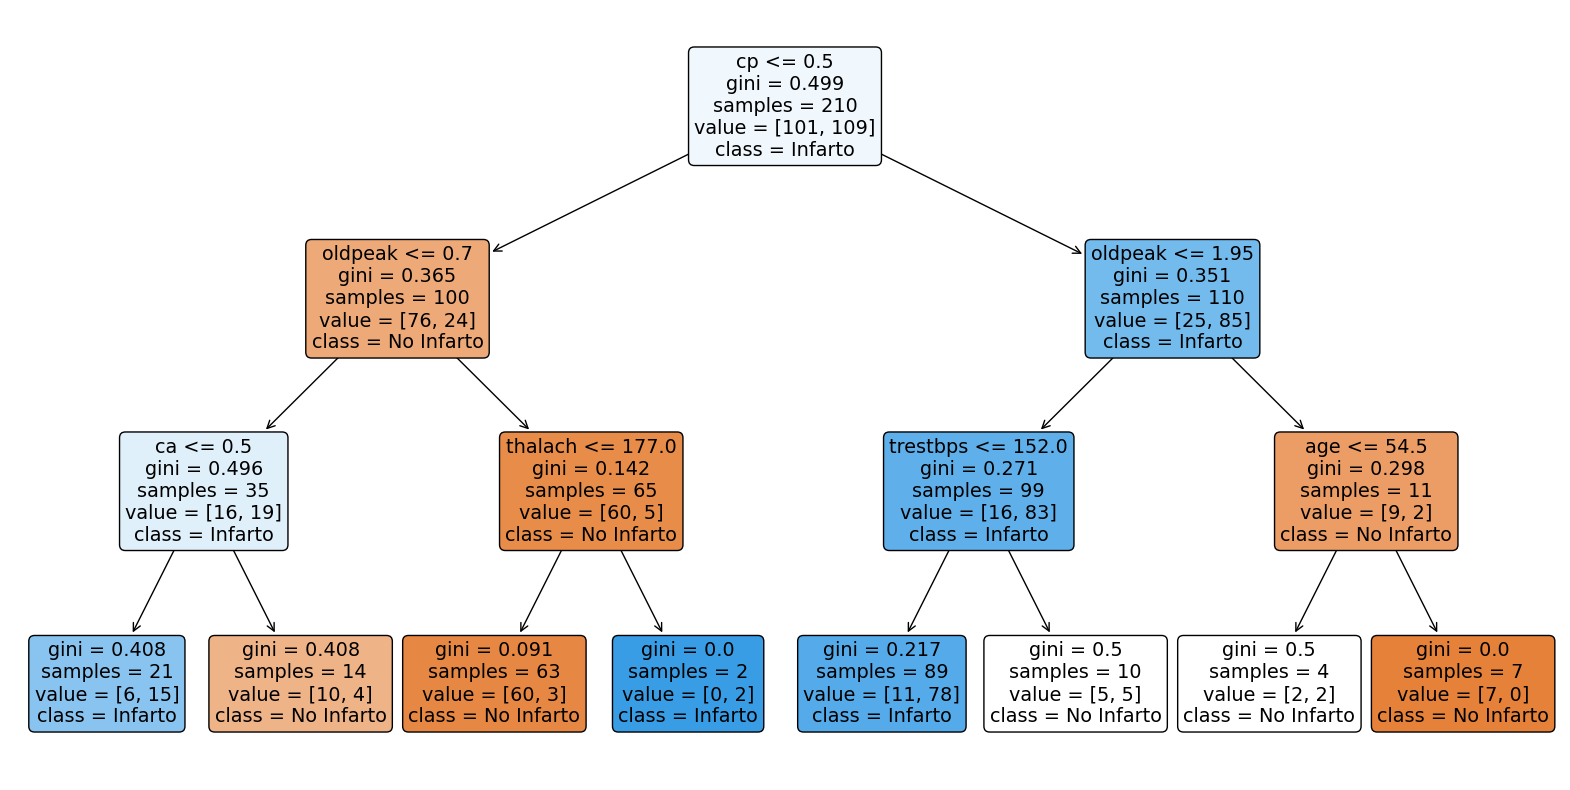

In [59]:
# Entrenar el mejor modelo
best_model = DecisionTreeClassifier(criterion="gini", max_depth=3)
best_model.fit(X_train, y_train)

# Dibujar el diagrama del árbol
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns.tolist(),
    class_names=["No Infarto", "Infarto"],
    filled=True,
    rounded=True,
)
plt.show()

In [61]:
# Obtener la importancia de las variables
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

feature_importance_df

,Feature,Importance
2,cp,0.507648
9,oldpeak,0.314396
7,thalach,0.060042
11,ca,0.052687
3,trestbps,0.043495
0,age,0.021731
1,sex,0.000000
4,chol,0.000000
5,fbs,0.000000
6,restecg,0.000000


#### Evaluación del Árbol de Decisión Generado

1. **cp (Tipo de dolor torácico)**:
   - La primera división en el árbol se realiza en base a `cp` (tipo de dolor torácico), lo cual es consistente con la importancia clínica del dolor torácico en la predicción de infarto.

2. **oldpeak (Depresión del ST inducida por el ejercicio)**:
   - La segunda división significativa es por `oldpeak`, una variable que indica depresión del ST inducida por el ejercicio. Esto tiene sentido clínico ya que la depresión del ST es un importante indicador de problemas cardíacos.

3. **slope (Pendiente del segmento ST)**:
   - La variable `slope` también aparece en las divisiones, lo cual es coherente ya que la pendiente del segmento ST puede indicar problemas cardíacos.

4. **thalach (Frecuencia cardiaca máxima alcanzada)**:
   - La frecuencia cardiaca máxima alcanzada (`thalach`) también es una variable importante en la división, lo cual es lógico ya que una menor frecuencia cardiaca máxima puede ser un indicador de problemas cardíacos.

5. **ca (Número de vasos principales)**:
   - La variable `ca`, que indica el número de vasos principales con obstrucción, aparece varias veces en el árbol. Esto es coherente con el conocimiento clínico de que la cantidad de vasos afectados es un indicador importante en la evaluación de enfermedades cardíacas.

6. **trestbps (Tensión arterial en reposo)**:
   - La variable `trestbps` también aparece en el árbol, aunque en una división más profunda. Esto indica que la tensión arterial en reposo puede tener una influencia, pero no es tan determinante como otras variables en las primeras divisiones.

### Coherencia del Árbol Generado

El árbol generado parece ser coherente por varias razones:

1. **Variables Relevantes**:
   - Las divisiones del árbol utilizan variables que tienen sentido clínico y son conocidas por estar asociadas con enfermedades cardíacas, como `cp`, `oldpeak`, `slope`, `thalach`, y `ca`.

2. **Divisiones Lógicas**:
   - Las divisiones son lógicas y progresivas. Por ejemplo, `oldpeak` y `thalach` aparecen temprano en el árbol, lo cual es consistente con su relevancia clínica en la detección de infarto.

3. **Distribución de Clases**:
   - Las distribuciones de las clases en los nodos hojas reflejan divisiones significativas entre pacientes con y sin probabilidad de infarto. Los valores de `gini` indican que las divisiones están ayudando a separar las clases de manera efectiva.

## Actividad 4

In [71]:
# Cargar el archivo CSV de validación
df_val = pd.read_csv("heart_val.csv")

In [73]:
# Visualizar las primeras filas del dataset
df_val.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
1,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
2,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
3,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
4,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0


In [75]:
# Obtener un resumen estadístico de los datos
df_val.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,54.919118,0.713235,0.845588,131.147059,246.022059,0.139706,0.492647,146.088235,0.360294,1.197794,1.345588,0.889706,2.389706,0.455882
std,8.604956,0.453923,1.002801,18.212543,52.947698,0.347963,0.530497,23.305530,0.481861,1.234712,0.600971,1.079594,0.573137,0.499891
min,35.000000,0.000000,0.000000,101.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,50.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,131.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,237.000000,0.000000,0.000000,148.500000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,271.250000,0.000000,1.000000,163.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,186.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [77]:
# Estudiamos el DataFrame
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       136 non-null    int64  
 1   sex       136 non-null    int64  
 2   cp        136 non-null    int64  
 3   trestbps  136 non-null    int64  
 4   chol      136 non-null    int64  
 5   fbs       136 non-null    int64  
 6   restecg   136 non-null    int64  
 7   thalach   136 non-null    int64  
 8   exang     136 non-null    int64  
 9   oldpeak   136 non-null    float64
 10  slope     136 non-null    int64  
 11  ca        136 non-null    int64  
 12  thal      136 non-null    int64  
 13  target    136 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 15.0 KB


In [139]:
# Separar características y variable objetivo
X_val = df_val.drop("target", axis=1)
y_val = df_val["target"]

# Realizar predicciones con el mejor modelo
y_pred_val = best_model.predict(X_val)

# Calcular la métrica de exactitud
accuracy_val = accuracy_score(y_val, y_pred_val)

print(f"accuracy_val - {np.round(accuracy_val, 2)}")

y_pred_val

accuracy_val - 0.88


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0], dtype=int64)

In [135]:
# Obtener la matriz de confusión para calcular aciertos y fallos
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
true_negatives_val, false_positives_val, false_negatives_val, true_positives_val = (
    conf_matrix.ravel()
)

# Mostrar resultados
print(f"Exactitud del conjunto de validación: {np.round(accuracy_val, 2)}")
print(f"Aciertos: {true_negatives_val + true_positives_val}")
print(f"Fallos: {false_positives_val + false_negatives_val}")
print(f"Matriz de confusión:\n{conf_matrix_val}")

Exactitud del conjunto de validación: 0.88
Aciertos: 119
Fallos: 17
Matriz de confusión:
[[64 10]
 [ 7 55]]


### Matriz de Confusión del Conjunto de Validación

- **64 (Verdaderos Negativos - TN)**: El modelo predijo "No Infarto" y la realidad era "No Infarto".
- **10 (Falsos Positivos - FP)**: El modelo predijo "Infarto" pero la realidad era "No Infarto".
- **7 (Falsos Negativos - FN)**: El modelo predijo "No Infarto" pero la realidad era "Infarto".
- **55 (Verdaderos Positivos - TP)**: El modelo predijo "Infarto" y la realidad era "Infato".


In [127]:
# Pruebas manuales
num_samples = 5  # Número de pruebas manuales a realizar
random_indices = np.random.choice(len(X_val), num_samples, replace=False)

print("\nPruebas Manuales:")
for idx in random_indices:
    print(f"Observación {idx}:")
    print(f"Predicción esperada : {y_val.iloc[idx]}")
    print(f"Predicción del modelo: {y_pred_val[idx]}")
    print("---")


Pruebas Manuales:
Observación 17:
Predicción esperada : 0
Predicción del modelo: 0
---
Observación 73:
Predicción esperada : 0
Predicción del modelo: 0
---
Observación 43:
Predicción esperada : 1
Predicción del modelo: 1
---
Observación 86:
Predicción esperada : 0
Predicción del modelo: 0
---
Observación 105:
Predicción esperada : 1
Predicción del modelo: 1
---


### Calculamos la métrica de exactitud en el conjunto de prueba original para comparar

In [141]:
# Realizar predicciones en el conjunto de prueba original para comparación
y_pred_test = best_model.predict(X_test)

# Calcular la métrica de exactitud en el conjunto de prueba original
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"accuracy_val - {np.round(accuracy_test, 2)}")

y_pred_test

accuracy_val - 0.77


array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [143]:
# Obtener la matriz de confusión para el conjunto de prueba original
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
true_negatives_test, false_positives_test, false_negatives_test, true_positives_test = (
    conf_matrix_test.ravel()
)

# Mostrar resultados del conjunto de prueba original
print(f"Exactitud del conjunto de validación: {np.round(accuracy_test, 2)}")
print(f"Aciertos: {true_negatives_test + true_positives_test}")
print(f"Fallos: {false_positives_test + false_negatives_test}")
print(f"Matriz de confusión:\n{conf_matrix_test}")

Exactitud del conjunto de validación: 0.77
Aciertos: 70
Fallos: 21
Matriz de confusión:
[[28  9]
 [12 42]]


### Matriz de Confusión del Conjunto de Validación

- **28 (Verdaderos Negativos - TN)**: El modelo predijo "No Infarto" y la realidad era "No Infarto".
- **9 (Falsos Positivos - FP)**: El modelo predijo "Infarto" pero la realidad era "No Infarto".
- **12 (Falsos Negativos - FN)**: El modelo predijo "No Infarto" pero la realidad era "Infarto".
- **42 (Verdaderos Positivos - TP)**: El modelo predijo "Infarto" y la realidad era "Infato".


## Actividad 5

In [161]:
# Separar características y la variable objetivo 'chol'
X = df.drop(["target", "chol"], axis=1)
y = df["chol"]

# Dividir los datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (210, 12)
Test: (91, 12)


In [166]:
# Entrenar el modelo de árbol de regresión con profundidad máxima = 4
regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [187]:
# Realizar predicciones
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Mostrar resultados
print("Conjunto de entrenamiento")
print("-------------------------")
print(f"MSE del conjunto de entrenamiento: {np.round(mse_train, 2)}")
print(f"MAE del conjunto de entrenamiento: {np.round(mae_train, 2)}")
print(f"R2 del conjunto de entrenamiento: {np.round(r2_train, 2)}")
print("\n")
print("Conjunto de prueba")
print("------------------")
print(f"MSE del conjunto de prueba: {np.round(mse_test, 2)}")
print(f"MAE del conjunto de prueba: {np.round(mae_test, 2)}")
print(f"R2 del conjunto de prueba: {np.round(r2_test, 2)}")

Conjunto de entrenamiento
-------------------------
MSE del conjunto de entrenamiento: 1409.4
MAE del conjunto de entrenamiento: 29.03
R2 del conjunto de entrenamiento: 0.37


Conjunto de prueba
------------------
MSE del conjunto de prueba: 4015.6
MAE del conjunto de prueba: 47.71
R2 del conjunto de prueba: -0.11


#### Error Cuadrático Medio (MSE)
- El MSE es significativamente más bajo en el conjunto de entrenamiento (1409.4) que en el conjunto de prueba (4015.6). Esto sugiere que el modelo está ajustando mejor los datos de entrenamiento que los datos de prueba, lo que puede ser una indicación de sobreajuste.

#### Error Absoluto Medio (MAE)
- El MAE sigue la misma tendencia, siendo más bajo en el conjunto de entrenamiento (29.03) que en el conjunto de prueba (47.71). Esto refuerza la indicación de que el modelo podría estar sobreajustado a los datos de entrenamiento.

#### Coeficiente de Determinación (R2)
- El R2 del conjunto de entrenamiento es 0.37, lo que indica que el modelo explica el 37% de la variabilidad de la variable objetivo en los datos de entrenamiento.
- El R2 del conjunto de prueba es -0.11, lo que es una señal negativa ya que un R2 negativo indica que el modelo es peor que un modelo que simplemente predice la media de la variable objetivo. Esto sugiere que el modelo no generaliza bien a datos nuevos y podría estar sobreajustado.

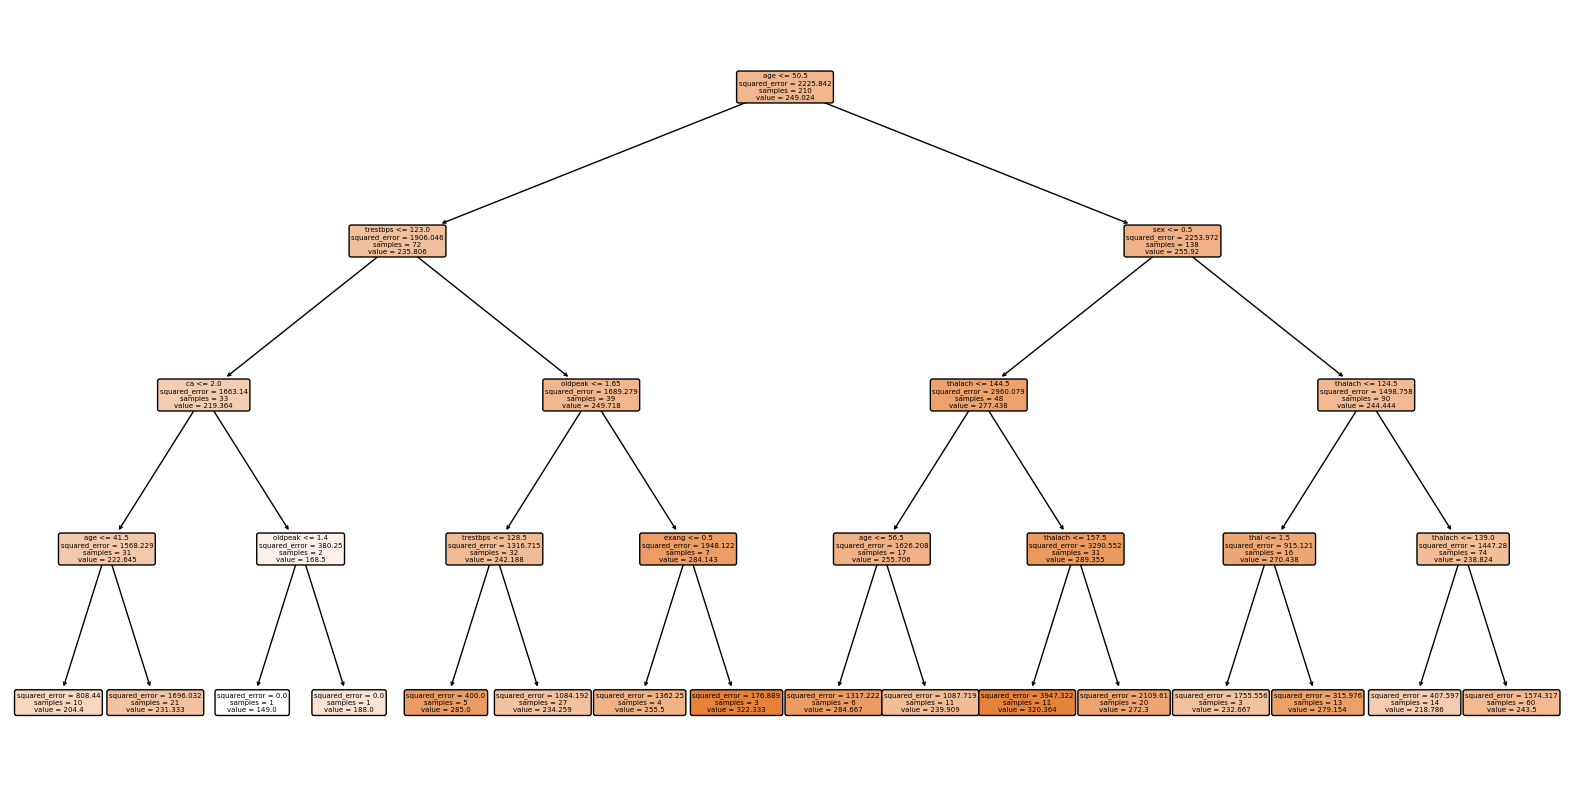

In [191]:
# Dibujar el diagrama del árbol
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()

In [204]:
# Realizar 5 predicciones manuales al azar
num_samples = 5  # Número de predicciones manuales a realizar
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

print("\nPredicciones Manuales al Azar:")
for idx in random_indices:
    print(f"Observación {idx}:")
    print(f"Características: {X_test.iloc[idx].to_dict()}")
    print(f"Valor Real de chol: {y_test.iloc[idx]}")
    print(f"Predicción del modelo: {y_pred_test[idx]}")
    print("---")


Predicciones Manuales al Azar:
Observación 18:
Características: {'age': 59.0, 'sex': 1.0, 'cp': 2.0, 'trestbps': 150.0, 'fbs': 1.0, 'restecg': 1.0, 'thalach': 157.0, 'exang': 0.0, 'oldpeak': 1.6, 'slope': 2.0, 'ca': 0.0, 'thal': 2.0}
Valor Real de chol: 212
Predicción del modelo: 243.5
---
Observación 53:
Características: {'age': 65.0, 'sex': 1.0, 'cp': 0.0, 'trestbps': 135.0, 'fbs': 0.0, 'restecg': 0.0, 'thalach': 127.0, 'exang': 0.0, 'oldpeak': 2.8, 'slope': 1.0, 'ca': 1.0, 'thal': 3.0}
Valor Real de chol: 254
Predicción del modelo: 218.78571428571428
---
Observación 12:
Características: {'age': 44.0, 'sex': 1.0, 'cp': 0.0, 'trestbps': 120.0, 'fbs': 0.0, 'restecg': 1.0, 'thalach': 144.0, 'exang': 1.0, 'oldpeak': 2.8, 'slope': 0.0, 'ca': 0.0, 'thal': 1.0}
Valor Real de chol: 169
Predicción del modelo: 231.33333333333334
---
Observación 32:
Características: {'age': 60.0, 'sex': 0.0, 'cp': 2.0, 'trestbps': 120.0, 'fbs': 1.0, 'restecg': 1.0, 'thalach': 96.0, 'exang': 0.0, 'oldpeak': 0.0

### Acciones recomendadas para mejorar el resultado del modelo.

- Reducir la profundidad máxima del árbol podría ayudar a mejorar la generalización del modelo. Probar con valores menores para `max_depth`.
- Utilizar validación cruzada para evaluar la estabilidad del modelo en diferentes subconjuntos de los datos de entrenamiento.
- Considerar la creación de nuevas características o la transformación de las existentes para mejorar el poder predictivo del modelo.
- Si es posible, aumentar el conjunto de datos puede ayudar a mejorar el rendimiento del modelo al proporcionar más información para el entrenamiento.